In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Import Library

In [26]:
import os
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

# Prepocessing

## Data Initiations 

In [27]:
path_file = os.listdir('../scrapping/downloads')
print(path_file)

['Ayam Goreng Kentucky', 'Bakso', 'Beef Burger', 'Bubur Ayam', 'Bubur Kacang Hijau', 'Gado-Gado', 'Kalio Ayam', 'Karedok', 'Ketoprak', 'Martabak Mesir', 'Mie Aceh Rebus', 'Mie Ayam', 'Mie Pangsit Basah', 'Nasi Ayam Goreng', 'Nasi Ayam Taliwang', 'Nasi Ayam Teriyaki', 'Nasi Gulai Ikan', 'Nasi Ikan Sarden', 'Nasi Rames', 'Nasi Rendang', 'Pempek Telur', 'Rendang Sapi', 'Siomay', 'SOp Daging Sapi', 'Soto Betawi', 'Soto Padang']


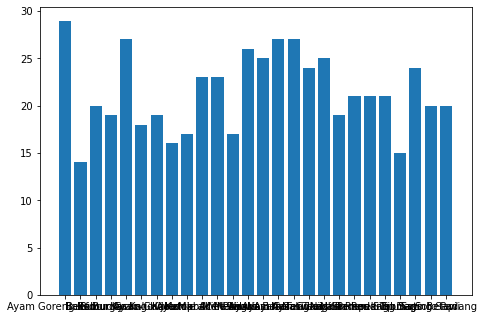

In [29]:
langs = []
qty = []

for x in path_file:
    langs.append(x)
    qty.append(len('path_file' + x))
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = langs
qty = qty
ax.bar(langs,qty)
plt.show()

## Split Dataset

In [51]:
os.mkdir('../scrapping/dataset_ml')
os.mkdir('../scrapping/dataset_ml/training')
os.mkdir('../scrapping/dataset_ml/testing')
    
for x in os.listdir('../scrapping/downloads'):
    os.mkdir('../scrapping/dataset_ml/training/' + x)
    os.mkdir('../scrapping/dataset_ml/testing/' + x)

In [57]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = list()
    for fname in os.listdir(SOURCE):
        f = SOURCE + fname
        if os.path.getsize(f) > 0:
            files.append(fname)

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled = random.sample(files, len(files))
    training_set = shuffled[0:training_length]
    testing_set = shuffled[:testing_length]

    for fname in training_set:
        tfile = SOURCE + fname
        destin = TRAINING + fname
        copyfile(tfile, destin)
        
    for fname in testing_set:
        tfile = SOURCE + fname
        destin = TESTING + fname
        copyfile(tfile, destin)

split_size = .9

for x in os.listdir('../scrapping/downloads'):
    split_data('../scrapping/downloads/' + x + '/', '../scrapping/dataset_ml/training/' + x + '/', '../scrapping/dataset_ml/testing/' + x + '/', split_size)

In [58]:
for x in os.listdir('../scrapping/dataset_ml/training'):
    print('name:', x)
    print('train:', len(os.listdir('../scrapping/dataset_ml/training/'+ x + '/')))
    print('test', len(os.listdir('../scrapping/dataset_ml/testing/'+ x + '/')))
    print('---------------------------------------------------------')

name: Ayam Goreng Kentucky
train: 100
test 11
---------------------------------------------------------
name: Bakso
train: 90
test 11
---------------------------------------------------------
name: Beef Burger
train: 89
test 10
---------------------------------------------------------
name: Bubur Ayam
train: 90
test 11
---------------------------------------------------------
name: Bubur Kacang Hijau
train: 90
test 10
---------------------------------------------------------
name: Gado-Gado
train: 90
test 10
---------------------------------------------------------
name: Kalio Ayam
train: 90
test 10
---------------------------------------------------------
name: Karedok
train: 90
test 10
---------------------------------------------------------
name: Ketoprak
train: 89
test 10
---------------------------------------------------------
name: Martabak Mesir
train: 89
test 10
---------------------------------------------------------
name: Mie Aceh Rebus
train: 89
test 10
------------------

## Model CNN

In [91]:
# DEFINE A KERAS MODEL TO CLASSIFY
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

## Image Generator

In [92]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '../scrapping/dataset_ml/training'
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 26,
    target_size = (150,150),
    class_mode = 'categorical' 
)

VALIDATION_DIR = '../scrapping/dataset_ml/testing'
validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 26,
    target_size = (150,150),
    class_mode = 'categorical' 
)

Found 2326 images belonging to 26 classes.
Found 266 images belonging to 26 classes.


## Callback

In [93]:
# callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='../scrapping/checkpoint',
#     monitor='val_acc',
#     mode='max',
#     save_best_only=True)

## Train Model

In [103]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch= 2326 / 26,
#     # steps_per_epoch= 26,
#     # steps_per_epoch=len(train_generator)/ 26,
#     epochs= 5,    
#     validation_data=validation_generator,
#     validation_steps= 266 / 26,
#     # validation_steps= 26,
#     # validation_steps=len(validation_generator)/26,
#     verbose=2
#     # callbacks= [callback]
# )

history = model.fit(
    train_generator,
    steps_per_epoch= 2326//26,
    epochs= 25,
    validation_data=validation_generator,
    validation_steps= 266//26,
    verbose=2
    #callbacks= [callback]
)

In [ ]:
import datetime

x = datetime.datetime.now()
model.save('model_'+ x.year)